In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib  import cm

In [2]:
def thetas(Rd,Rn):
    theta2 = np.arccos(1-(2*Rd*Rd)/((Rd+Rn)*(Rd+Rn)))
    theta1 = np.pi/2 - theta2/2
    
    return theta1, theta2

def ls(Rd,Rn):
    theta2 = thetas(Rd,Rn)[1]
    ls = 2*Rn*np.sin(theta2/2)
    
    return ls

def HamiNeck(kappa,Rd,Rn):
    theta1 = thetas(Rd,Rn)[0]
    theta2 = thetas(Rd,Rn)[1]
    line = 2*np.pi*Rd*np.sin(theta1)
    arc = Rn*theta2
    Rneck = Rd*np.sin(theta1)
    curvsq = (1/(Rn)  - 1/(Rneck))*(1/(Rn)  - 1/(Rneck))
    
    Energy = (kappa/2)*curvsq*line*arc
    return Energy

def HamiCyl(Rcyl, l,kappa):
    Hami = np.pi*kappa*(Rcyl/l)
    return Hami

def tcyl(Rcyl,l,W,sigma,kappa,eta):
    v_up = W/eta - sigma/eta - kappa/(2*eta*Rcyl*Rcyl)
    t = l/v_up
    
    return t

In [3]:
## Parameters
Rd = 0.0000005 #meter
Rcyl = Rd/20 #meter
kappa = 25 #8.0868E-20 #Joules

Rn = np.linspace(Rd*0.02,Rd*1.4,100)
els = np.linspace(Rd*0.02,Rd*1.4,100)
lls = []
Hamis = []
HamisCyl = []
for r in range(len(Rn)):
    Hamis.append(HamiNeck(kappa,Rd,Rn[r]))
    lls.append(ls(Rd,Rn[r]))
for el in range(len(els)):
    l = els[el]
    HamisCyl.append(HamiCyl(Rcyl, l,kappa))


314.1592653589793


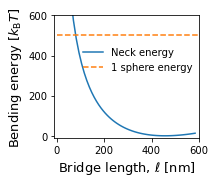

In [4]:
fig,ax=plt.subplots(1,figsize = (3,2.5))
#ax[0].plot(np.multiply(Rn,10**9),np.multiply(lls,10**9))
ax.plot(np.multiply(lls,10**9),np.divide(Hamis,1), label = 'Neck energy')
#ax.plot([500,500],[-50,600], linestyle = ':',label = r'$R_{\mathrm{sph}}$')
ax.plot([0,600],[502,502], linestyle = '--',label = r'1 sphere energy')
ax.set_ylabel(r'Bending energy [$k_{\mathrm{B}}T$]', fontsize  = 13)
#ax[0].set_ylabel(r'Bridge length [nm]')
ax.set_ylim([-10,600])
ax.set_xlim([-10,600])
ax.set_xlabel(r'Bridge length, $\ell$ [nm]', fontsize  = 13)
#ax[0].plot(np.multiply(lls,10**9),np.ones(len(lls))*1*8*np.pi*kappa,linestyle = ':',linewidth = 5,label = 'Bending energy of 1 sphere')
ax.legend(frameon=False, loc = [0.17,0.5])
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(left=0.23)
fname = 'NeckEnergy_ell.pdf'
fig.savefig('Plots/'+fname)
print(np.pi*4*kappa)

/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_24340/256484052.py:2: RuntimeWarning: overflow encountered in exp
  ax.plot(np.multiply(lls,10**9),np.exp(Hamis))


Text(0.5, 0, 'Bridge length [nm]')

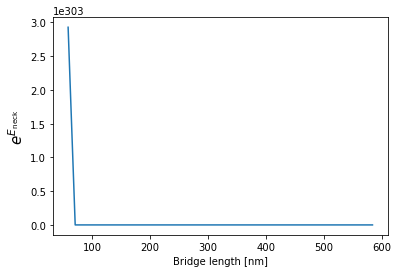

In [5]:
fig,ax=plt.subplots()
ax.plot(np.multiply(lls,10**9),np.exp(Hamis))
ax.set_ylabel(r'$e^{E_{\mathrm{neck}}}$',fontsize = 15)
ax.set_xlabel(r'Bridge length [nm]')
#ax.set_yscale('log')

Text(0, 0.5, 'Neck energy [100$k_{\\mathrm{B}}T$]')

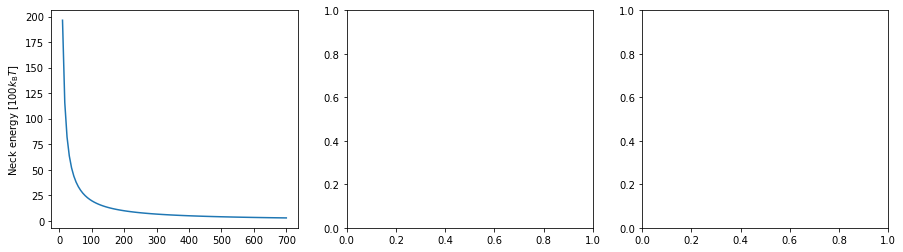

In [8]:
fig,ax=plt.subplots(1,3,figsize = (15,4))
ax[0].plot(np.multiply(els,10**9),HamisCyl)
ax[0].set_ylabel(r'Neck energy [100$k_{\mathrm{B}}T$]')
#ax[1].plot(np.multiply(Rn,10**9),np.divide(Hamis,1))
#ax[2].plot(np.multiply(lls,10**9),np.divide(Hamis,1), label = 'Bending energy of neck')